<a href="https://colab.research.google.com/github/jclase/CSC-302-HW/blob/main/HW4_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


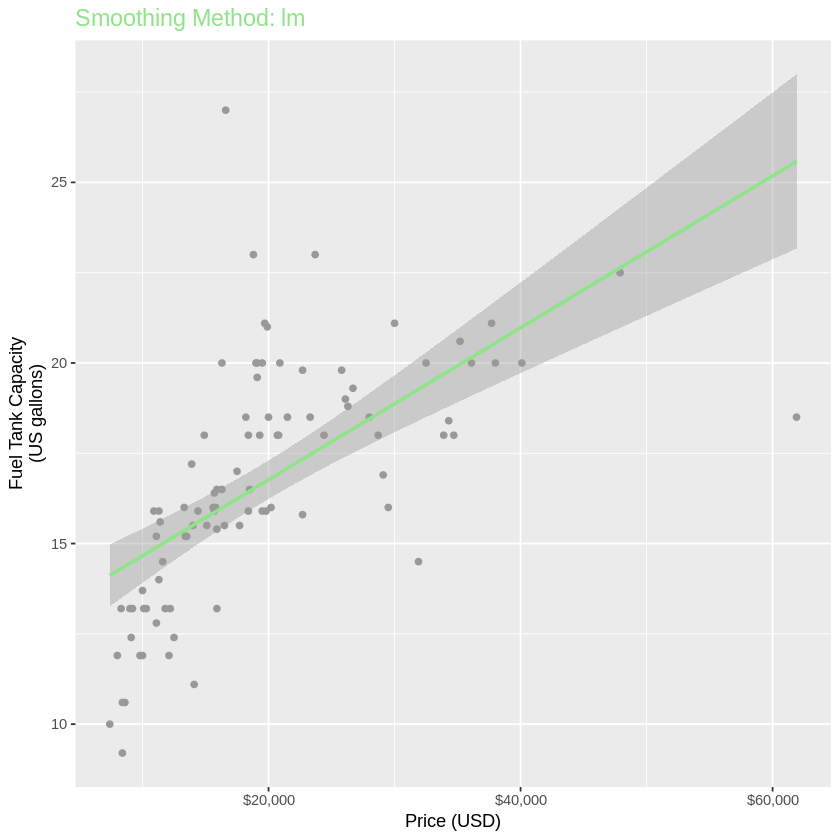

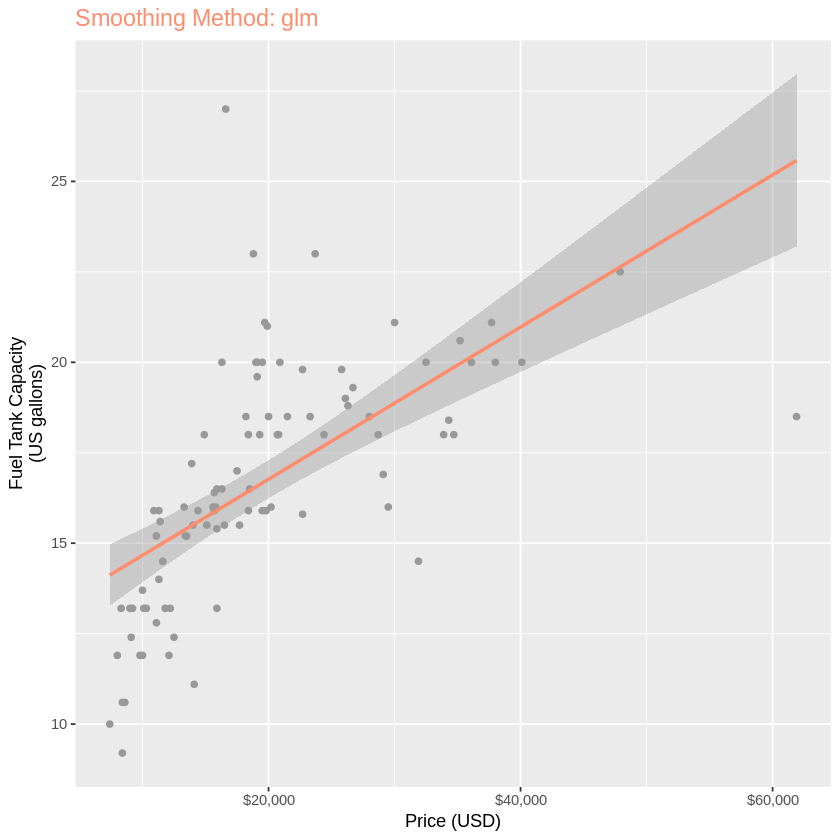

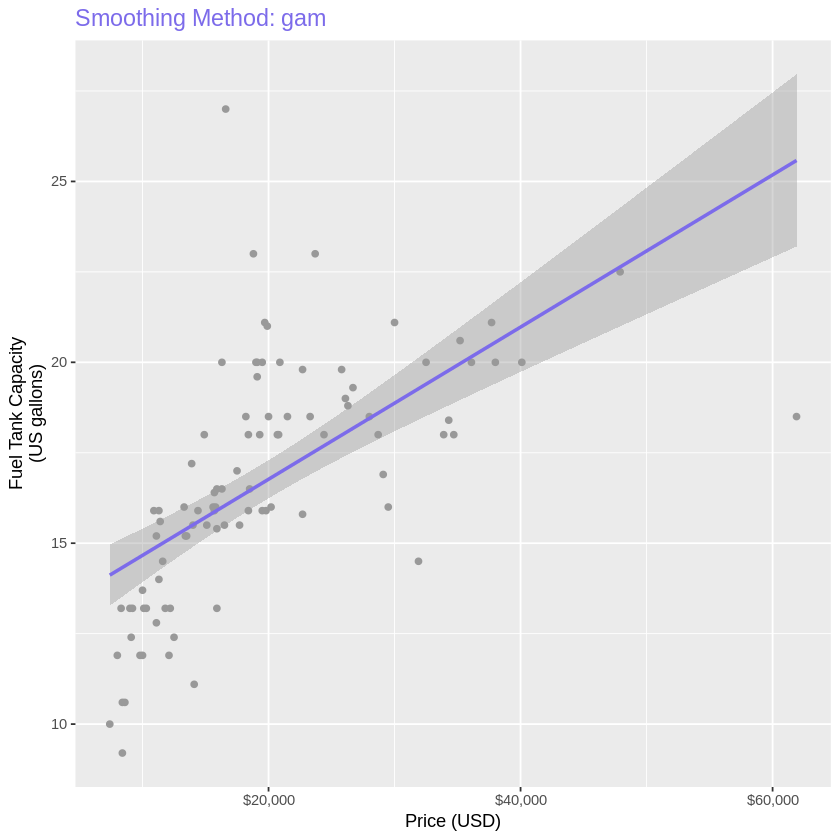

In [ ]:
library(ggplot2)
library(MASS)
cars93 <- MASS::Cars93
methods <- c("lm", "glm", "gam")
colors <- c("#8fe388", "#fe8d6d", "#7c6bea")
for (i in 1:length(methods)) {
  p <- ggplot(cars93, aes(x = Price, y = Fuel.tank.capacity)) +
    geom_point(color = "grey60") +
    geom_smooth(se = TRUE, method = methods[i], formula = y ~ x, color = colors[i]) +
    scale_x_continuous(name = "Price (USD)", breaks = c(20, 40, 60), labels = c("$20,000", "$40,000", "$60,000")) +
    scale_y_continuous(name = "Fuel Tank Capacity\n(US gallons)") +
    ggtitle(paste("Smoothing Method:", methods[i])) +
    theme(plot.title = element_text(size = 14, color = colors[i]))

  print(p)
}

# A tibble: 0 × 3
# ℹ 3 variables: archive <fct>, date <date>, count <int>


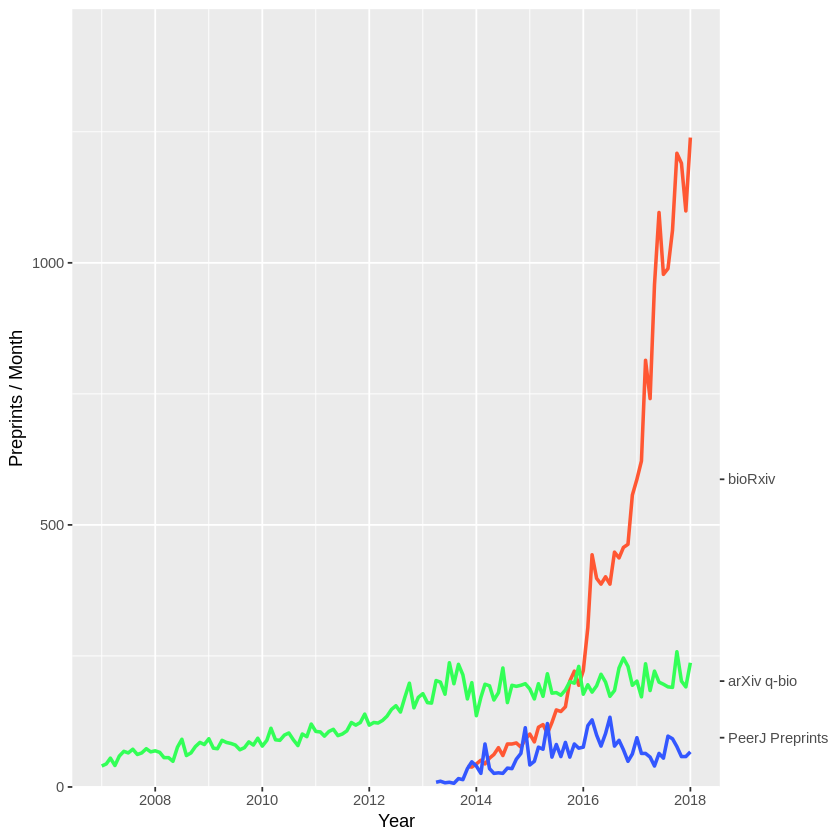

In [ ]:
library(ggplot2)
library(dplyr)
library(lubridate)
load("/content/drive/MyDrive/Colab Notebooks/DATA/preprint_growth.rda")
preprints <- preprint_growth %>%
  filter(archive %in% c("bioRxiv", "arXiv q-bio", "PeerJ Preprints")) %>%
  filter(count > 0) %>%
  mutate(archive = factor(archive, levels = c("bioRxiv", "arXiv q-bio", "PeerJ Preprints")))
removed_rows <- preprints %>% filter(is.na(count) | count < 0)
print(removed_rows)
preprints_final <- preprints %>%
  filter(date == ymd("2017-01-01"))
ggplot(preprints, aes(date, count, color = archive, fill = archive)) +
  geom_line(linewidth = 1, na.rm = TRUE) +
  scale_y_continuous(
    limits = c(0, max(preprints$count, na.rm = TRUE)),
    expand = c(0, 0),
    name = "Preprints / Month",
    sec.axis = dup_axis(
      breaks = preprints_final$count,
      labels = c("arXiv q-bio", "PeerJ Preprints", "bioRxiv"),
      name = NULL
    )
  ) +
  scale_x_date(name = "Year", limits = c(min(preprints$date, na.rm = TRUE), ymd("2018-01-01"))) +
  scale_color_manual(values = c("#FF5733", "#33FF57", "#3357FF"), name = NULL) +
  theme(legend.position = "none")
